In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('fivethirtyeight')

### Загрузка датафрейма из файла

In [11]:
df = pd.read_csv('dataset.csv', parse_dates = ['event_datetime', 'event_receive_datetime'])

In [12]:
# визуальная проверка на адекватность загрузки
df.sample(5)

,profile_id,os_version,device_manufacturer,device_model,device_type,device_locale,event_name,event_json,event_datetime,event_timestamp,event_receive_datetime,event_receive_timestamp,connection_type,operator_name,country_iso_code,city
777142,JME5UmQdOyi,12,Samsung,SM-G991U,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 05:29:06,1644200946,2022-02-07 05:29:50,1644200990,wifi,Verizon,US,NaN
735263,JLpjLVVeR3N,10,Motorola,moto z4,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 20:27:03,1644254823,2022-02-07 20:27:05,1644254825,wifi,Verizon,US,Camden
192096,JLzbwW2yG3F,12,Google,Pixel 5,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-06 09:23:48,1644128628,2022-02-06 09:24:11,1644128651,wifi,Verizon,US,NaN
577464,JLvfT2hL8sD,11,OnePlus,OnePlus6T,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 21:54:42,1644260082,2022-02-07 21:55:35,1644260135,wifi,T-Mobile,US,Jacksonville
370442,JLmwR9sbxQD,11,Samsung,Galaxy S10,phone,en_US,c_ad_revenue,"{""ad_type"":""banner"",""placement"":"""",""view_index...",2022-02-07 15:49:45,1644238185,2022-02-07 15:50:48,1644238248,cell,T-Mobile,US,Cleveland


### EDA

In [13]:
# посмотрим общую информацию о датасете
print(f'Количество строк {df.shape[0]} и столбцов {df.shape[1]}')

Количество строк 860079 и столбцов 16


In [14]:
# уточним по типам данных
df.dtypes

profile_id                         object
os_version                         object
device_manufacturer                object
device_model                       object
device_type                        object
device_locale                      object
event_name                         object
event_json                         object
event_datetime             datetime64[ns]
event_timestamp                     int64
event_receive_datetime     datetime64[ns]
event_receive_timestamp             int64
connection_type                    object
operator_name                      object
country_iso_code                   object
city                               object
dtype: object

In [15]:
# есть пропуски в profile_id, operator_name и 37% в city
df.isna().sum().mul(100) / len(df)

profile_id                  0.001628
os_version                  0.000000
device_manufacturer         0.000000
device_model                0.000000
device_type                 0.000000
device_locale               0.000000
event_name                  0.000000
event_json                  0.000000
event_datetime              0.000000
event_timestamp             0.000000
event_receive_datetime      0.000000
event_receive_timestamp     0.000000
connection_type             0.000000
operator_name               2.195031
country_iso_code            0.000000
city                       37.637008
dtype: float64

In [16]:
#проверим на дубликаты
df.duplicated().sum()

0

##### более подробно посмотрим на фичи в датафрейме

In [17]:
for col in df.columns:
    print(f'Количество уникальных значений в {col} равно {df[col].nunique()}')

Количество уникальных значений в profile_id равно 4226
Количество уникальных значений в os_version равно 11
Количество уникальных значений в device_manufacturer равно 34
Количество уникальных значений в device_model равно 284
Количество уникальных значений в device_type равно 2
Количество уникальных значений в device_locale равно 9
Количество уникальных значений в event_name равно 1
Количество уникальных значений в event_json равно 860076
Количество уникальных значений в event_datetime равно 322812
Количество уникальных значений в event_timestamp равно 322812
Количество уникальных значений в event_receive_datetime равно 180237
Количество уникальных значений в event_receive_timestamp равно 180237
Количество уникальных значений в connection_type равно 3
Количество уникальных значений в operator_name равно 92
Количество уникальных значений в country_iso_code равно 1
Количество уникальных значений в city равно 920


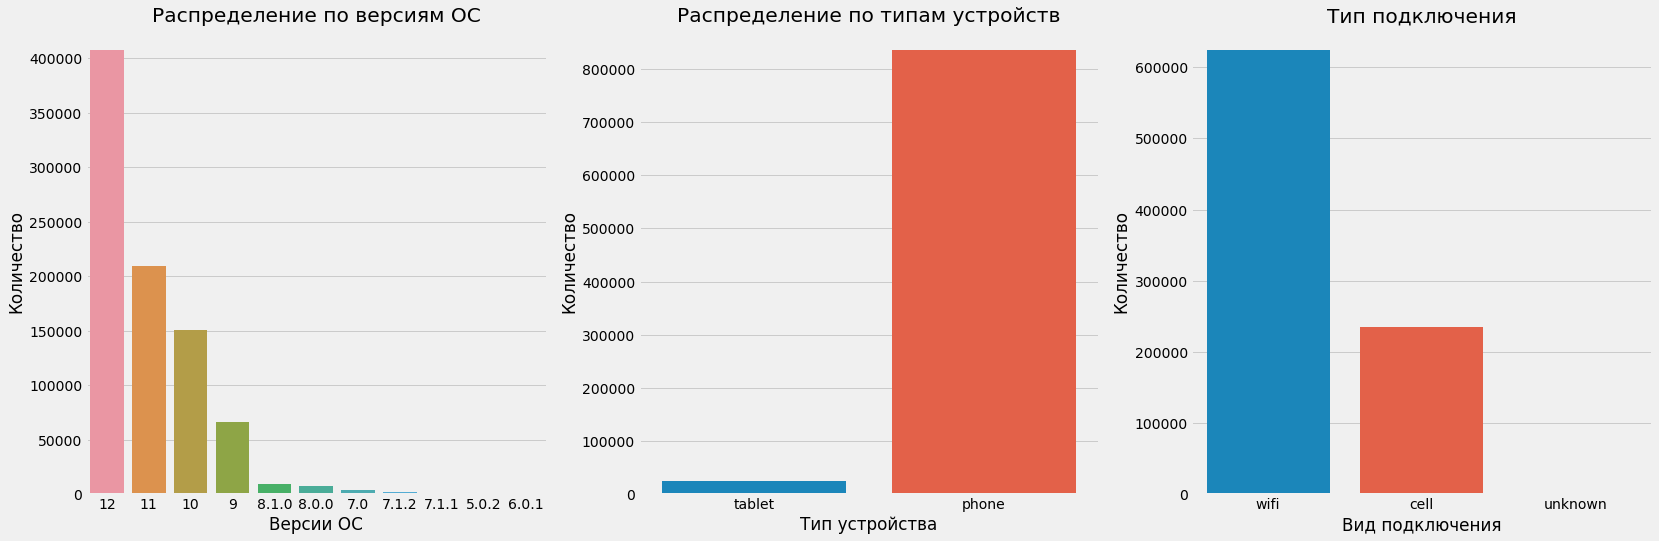

In [18]:
fig = plt.figure(figsize=(25, 8))
plt.subplot(1, 3, 1)
ax = sns.countplot(x='os_version', data=df, order=df['os_version'].value_counts(ascending=False).index)
ax.set_xlabel("Версии ОС")
ax.set_ylabel("Количество")
ax.set_title("Распределение по версиям ОС")

plt.subplot(1, 3, 2)
ax1 = sns.countplot(x='device_type', data=df)
ax1.set_title("Распределение по типам устройств")
ax1.set_xlabel("Тип устройства")
ax1.set_ylabel("Количество")

plt.subplot(1, 3, 3)
ax7=sns.barplot(x='index', y='connection_type', data=df['connection_type'].value_counts().reset_index())
ax7.set_title('Тип подключения')
ax7.set_xlabel('Вид подключения')
ax7.set_ylabel('Количество');

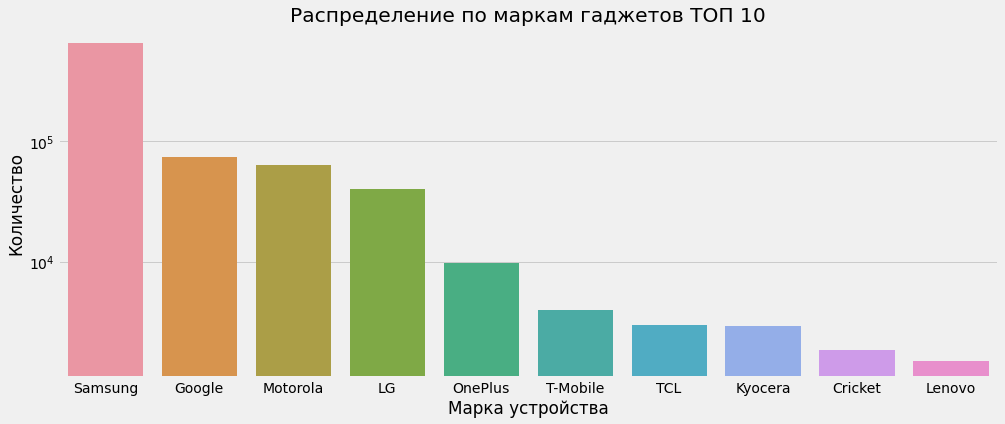

In [19]:
top10_device=df['device_manufacturer'].value_counts().nlargest(10).reset_index()
fig = plt.figure(figsize=(15, 6))
ax3 = sns.barplot(x='index',  y='device_manufacturer', data=top10_device)
ax3.set_title("Распределение по маркам гаджетов ТОП 10")
ax3.set_xlabel("Марка устройства")
ax3.set_ylabel("Количество")
ax3.set_yscale('log');

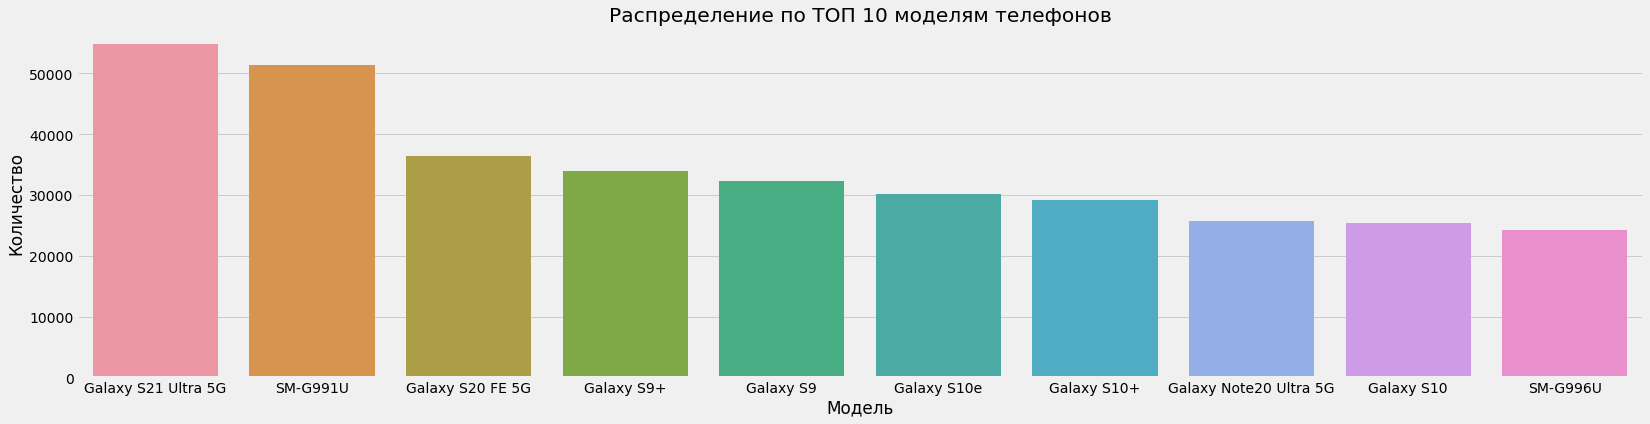

In [20]:
top10_cell_model = df['device_model'].value_counts().nlargest(10).reset_index()
fig = plt.figure(figsize=(25, 6))
ax4 = sns.barplot(x='index',  y='device_model', data=top10_cell_model)
ax4.set_title("Распределение по ТОП 10 моделям телефонов")
ax4.set_xlabel("Модель")
ax4.set_ylabel("Количество");

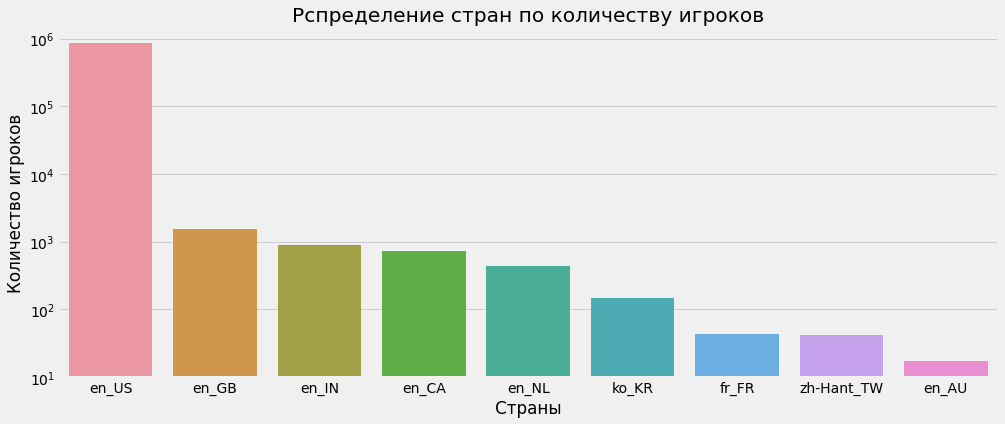

In [21]:
top10_country = df['device_locale'].value_counts().nlargest(10).reset_index()
fig = plt.figure(figsize=(15, 6))
ax5 = sns.barplot(x='index',  y='device_locale', data=top10_country)
ax5.set_yscale('log')
ax5.set_title("Рспределение стран по количеству игроков")
ax5.set_xlabel("Страны")
ax5.set_ylabel("Количество игроков");

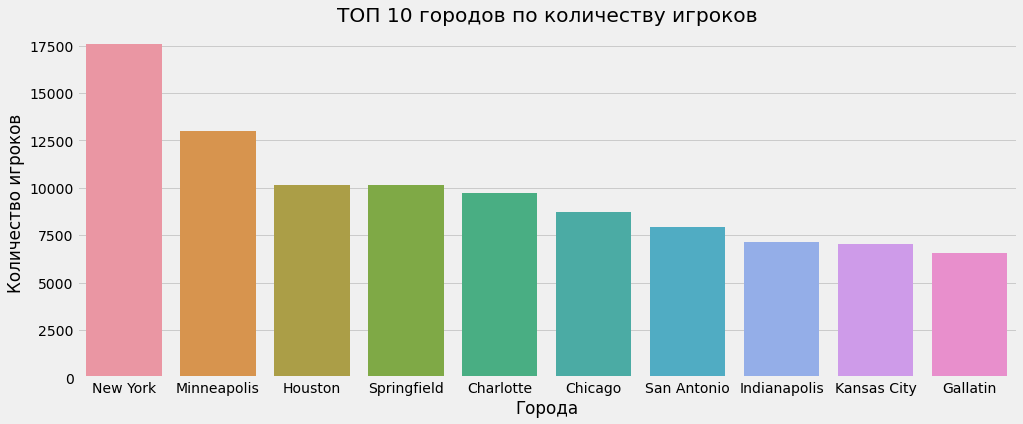

In [22]:
top10_cites = df['city'].value_counts().nlargest(10).reset_index()
fig = plt.figure(figsize=(15, 6))
ax6 = sns.barplot(x='index',  y='city', data=top10_cites)
ax6.set_title("ТОП 10 городов по количеству игроков")
ax6.set_xlabel("Города")
ax6.set_ylabel("Количество игроков");

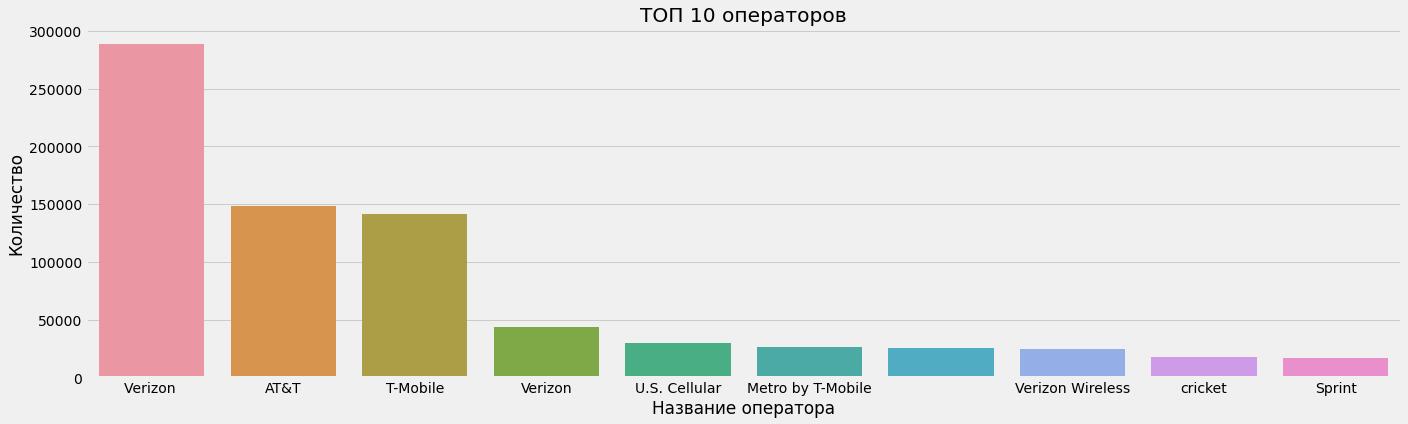

In [23]:
fig = plt.figure(figsize=(21, 6))
ax8=sns.barplot(x='index', y='operator_name', data=df['operator_name'].value_counts().nlargest(10).reset_index())
ax8.set_title('ТОП 10 операторов')
ax8.set_xlabel('Название оператора')
ax8.set_ylabel('Количество');

#### отдельно посмотрим на временные промежутки event_datetime и event_receive_datetime

In [24]:
df['event_datetime'].agg(['min', 'max'])

min   2022-01-29 17:42:32
max   2022-02-07 23:59:59
Name: event_datetime, dtype: datetime64[ns]

In [25]:
df['event_receive_datetime'].agg(['min', 'max'])

min   2022-02-03 00:00:02
max   2022-02-07 23:59:59
Name: event_receive_datetime, dtype: datetime64[ns]

In [26]:
# добавлю в df новые колонки, которые будут содержать день
df['event_day'] = df.event_datetime.dt.date
df['event_receive_day'] = df.event_receive_datetime.dt.date

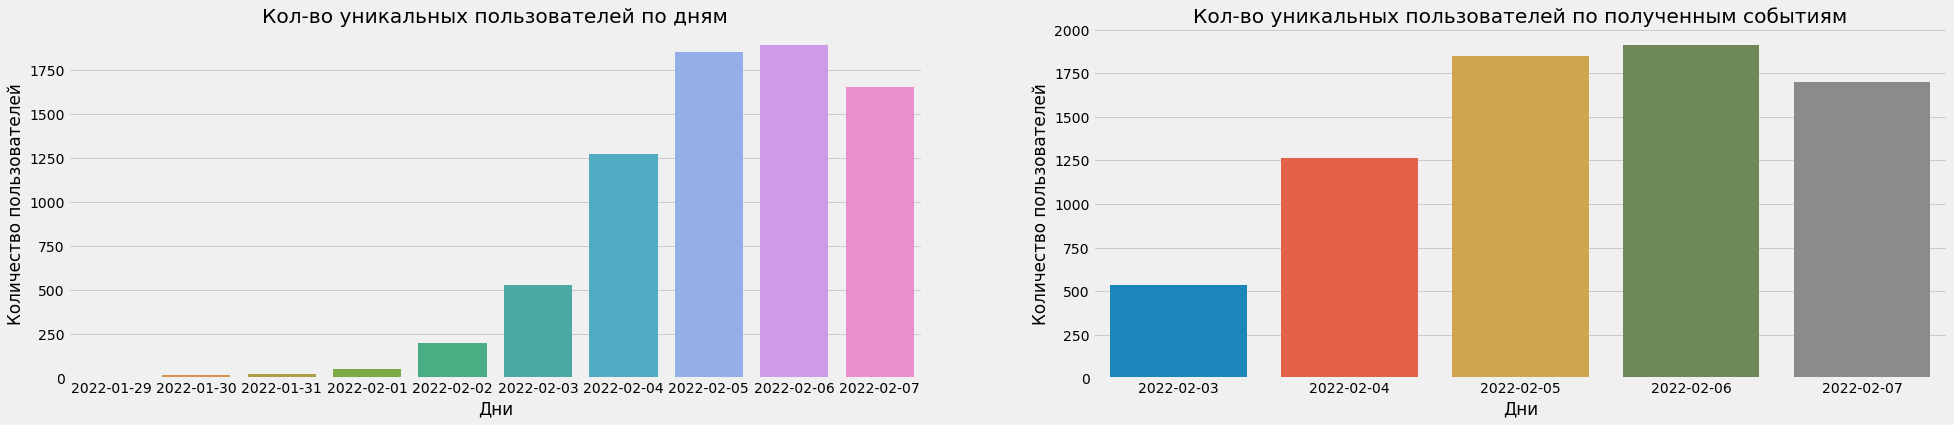

In [27]:
unique_user_per_day = df.groupby('event_day').profile_id.nunique().reset_index()
unique_user_per_receive_day = df.groupby('event_receive_day').profile_id.nunique().reset_index()
fig = plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
ax9 = sns.barplot(x='event_day', y='profile_id', data=unique_user_per_day)
ax9.set_title('Кол-во уникальных пользователей по дням')
ax9.set_xlabel('Дни')
ax9.set_ylabel('Количество пользователей')
plt.subplot(1, 2, 2)
ax10 = sns.barplot(x='event_receive_day', y='profile_id', data=unique_user_per_receive_day)
ax10.set_title('Кол-во уникальных пользователей по полученным событиям')
ax10.set_xlabel('Дни')
ax10.set_ylabel('Количество пользователей');

In [28]:
# добавлю в df новые колонки, которые будут содержать час
df['event_hour'] = df['event_datetime'].dt.hour
df['event_receive_hour'] = df.event_receive_datetime.dt.hour

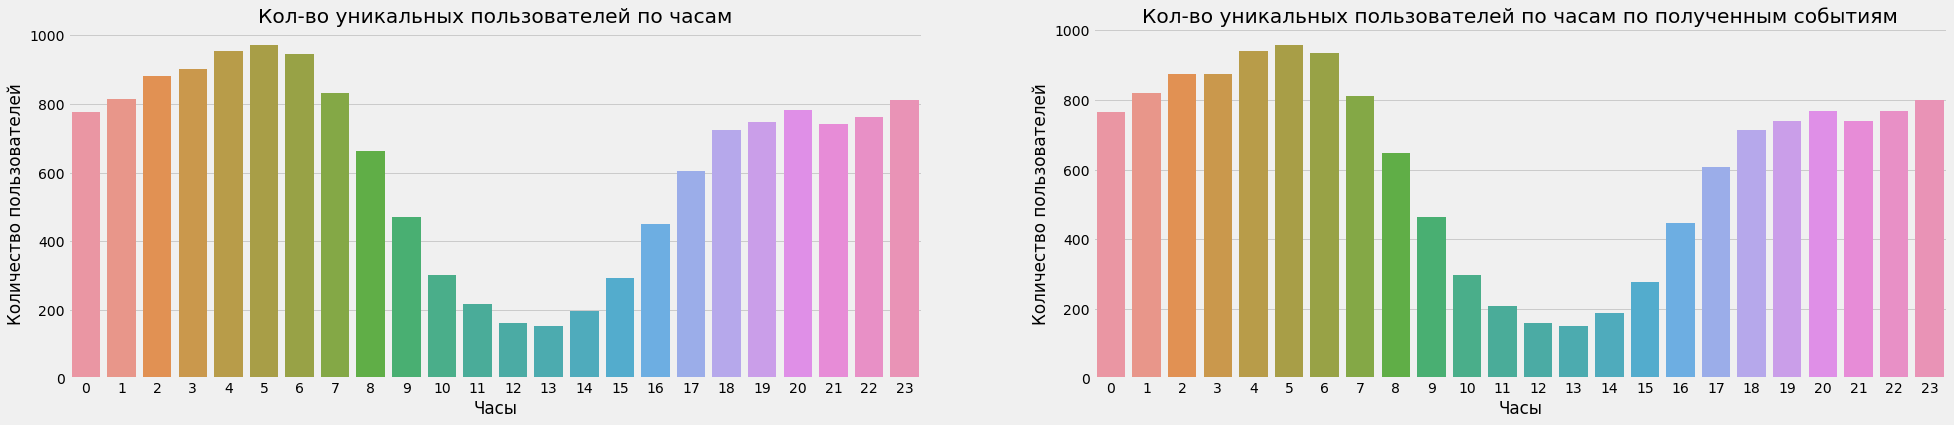

In [29]:
# делаю группировку
unique_user_per_hour = df.groupby('event_hour').profile_id.nunique().reset_index()
unique_user_per_receive_hour = df.groupby('event_receive_hour').profile_id.nunique().reset_index()

fig = plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
ax11 = sns.barplot(x='event_hour', y='profile_id', data=unique_user_per_hour)
ax11.set_title('Кол-во уникальных пользователей по часам')
ax11.set_xlabel('Часы')
ax11.set_ylabel('Количество пользователей')

plt.subplot(1, 2, 2)
ax12 = sns.barplot(x='event_receive_hour', y='profile_id', data=unique_user_per_receive_hour)
ax12.set_title('Кол-во уникальных пользователей по часам по полученным событиям')
ax12.set_xlabel('Часы')
ax12.set_ylabel('Количество пользователей');

### Общие выводы по EDA

В датасете представлена выборка по 4226 уникальным пользователям в период 2022-01-29 по 2022-02-07, которым показывалась реклама
начиная с 2022-02-03 по 2022-02-07. Георгафия игроков представлена в основном страной США, но есть представители Великобритании,
Индии.Всего 9 стран. Из 920 городов по количеству пользователей лидирует New York, на втором месте со значительным отставанием 
расположился Minneapolis, затем идет большая группа городов с примерно одиноковыми показателями: Houston, Springfield,Charlotte.
Игроки в подавляющем большинстве заходили со своих телефонов в основном через wi-fi. Люди в основном играют по вечерам 
или ночью, днем наблюдается спад активности.
 - Технические характеристики девайсов:
1. Работают на платформе Android, в основном представлены версии 12, 11, 10
2. Телефоны в основном бренда Samsung, но есть также Google, Motorola, LG, всего 34 бренда
3. Модели телефонов представлены серией Galaxy и SM

Телекомуникационные услуги обеспечивают 92 оператора связи. Основными из которых являются Verizon, AT&T и T-Mobile


### Feature engineering

В EDA уже создали ряд дополнительных фичей необходимых для первоночального анализа, теперь нужно более пристально поработать
над event_json, который содержит в себе информацию о показе рекламы:
 - ad_type – формат рекламы (int, banner или rv)
 - placement – когда/где был показ рекламы в игре
 - view_index – номер показа конкретного формата рекламы для юзера (не поддерживается для баннеров)
 - revenue – доход от конкретного показа рекламы (eCPM = revenue * 1000)
 - ads_ltv – накапливающийся доход от рекламы, равен сумме всех revenue юзера
 - network_name – рекламная сеть, от которой был показ

Проблема в том, что event_json это json словарь, для его анализа необходимо достать интересующие ключи и значения 
и переопределить их в новые столбцы

In [31]:
# подготовлю список полей, которые могут помочь при анализе рекламы
new_col = ['ad_type', 'placement', 'view_index', 'revenue', 'ads_ltv', 'network_name']

In [32]:
%%time
for col in new_col:
    df[col] = df['event_json'].apply(lambda x: eval(x).get(col, np.nan)).replace('', np.nan)
    print(f'создана новая колонка {col}')

создана новая колонка ad_type
создана новая колонка placement
создана новая колонка view_index
создана новая колонка revenue
создана новая колонка ads_ltv
создана новая колонка network_name
Wall time: 15min 36s


In [33]:
# проверим на отсутствующие значение в новых колонках, видно, что в placement почти 95% отстуствуют значения, в остальных все ок
df.isnull().sum().mul(100).round(2)[-6:] / len(df)

ad_type          0.000000
placement       94.873145
view_index       0.000000
revenue          0.000000
ads_ltv          0.000000
network_name     0.000000
dtype: float64

### EDA новых колонок по рекламе

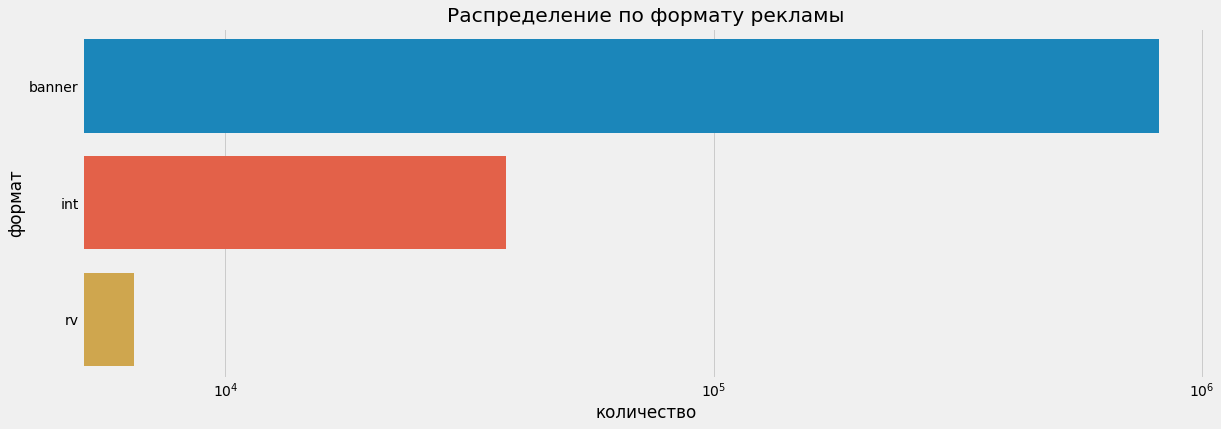

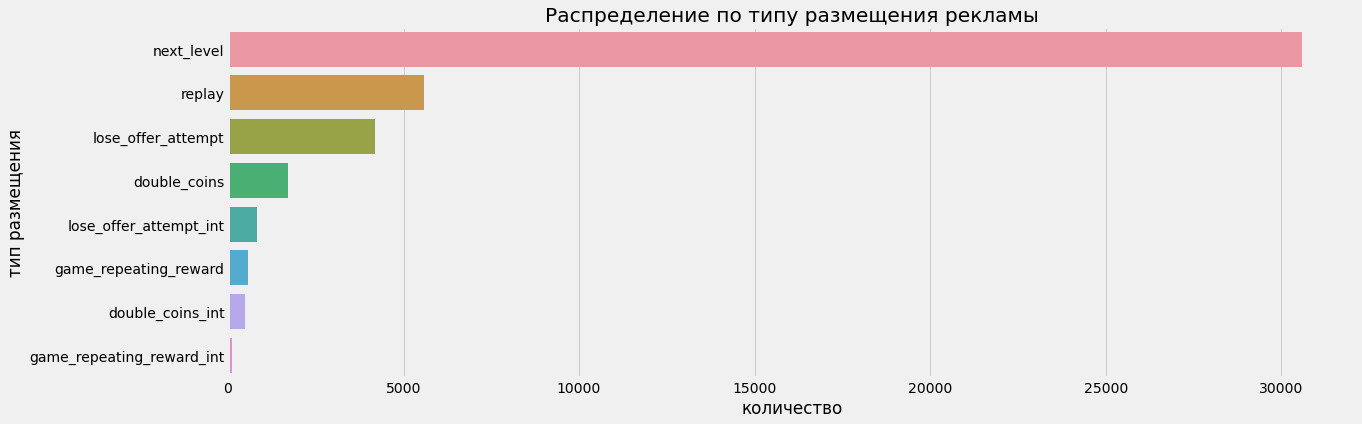

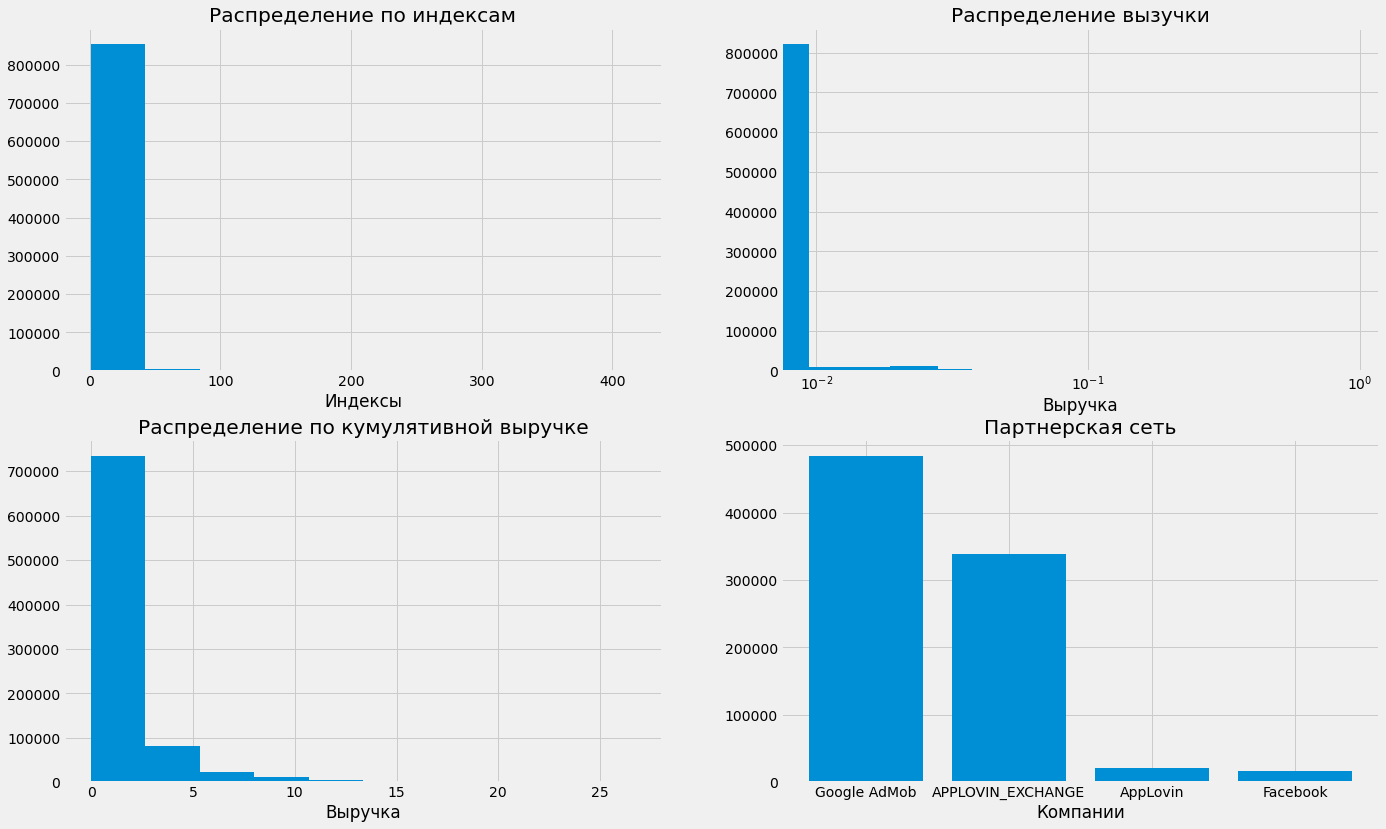

In [34]:
fig1 = plt.figure(figsize=(18,6))
ax_1 = sns.barplot(x='ad_type', y='index', data=df['ad_type'].value_counts().reset_index())
ax_1.set_title('Распределение по формату рекламы')
ax_1.set_xlabel('количество')
ax_1.set_ylabel('формат')
ax_1.set_xscale('log')

fig2 = plt.figure(figsize=(18,6))
ax_2 = sns.barplot(x='placement', y='index', data=df['placement'].value_counts().reset_index())
ax_2.set_title('Распределение по типу размещения рекламы')
ax_2.set_xlabel('количество')
ax_2.set_ylabel('тип размещения');

fig3 = plt.figure(figsize=(21, 20))
plt.subplot(3,2,1)
df['view_index'].hist()
plt.title('Распределение по индексам')
plt.xlabel('Индексы')

plt.subplot(3,2,2)
df['revenue'].hist(bins=100).set_xscale('log')
plt.title('Распределение вызучки')
plt.xlabel('Выручка')

plt.subplot(3,2,3)
df['ads_ltv'].hist()
plt.title('Распределение по кумулятивной выручке')
plt.xlabel('Выручка')
plt.subplot(3,2,4)

x = df['network_name'].value_counts().reset_index()['index']
y = df['network_name'].value_counts().reset_index()['network_name']
plt.bar(x,y)
plt.title('Партнерская сеть')
plt.xlabel('Компании');


Преобладающий тип рекламы - баннер, тип размещения "next_level", в основном выручка сосредоточена в диапозоне от 0 до 0,01 
с хвостом достигающий 1, реклама размещается в большенстве случаев на "Google AdMob" и "APPLOVIN_EXCHANGE"

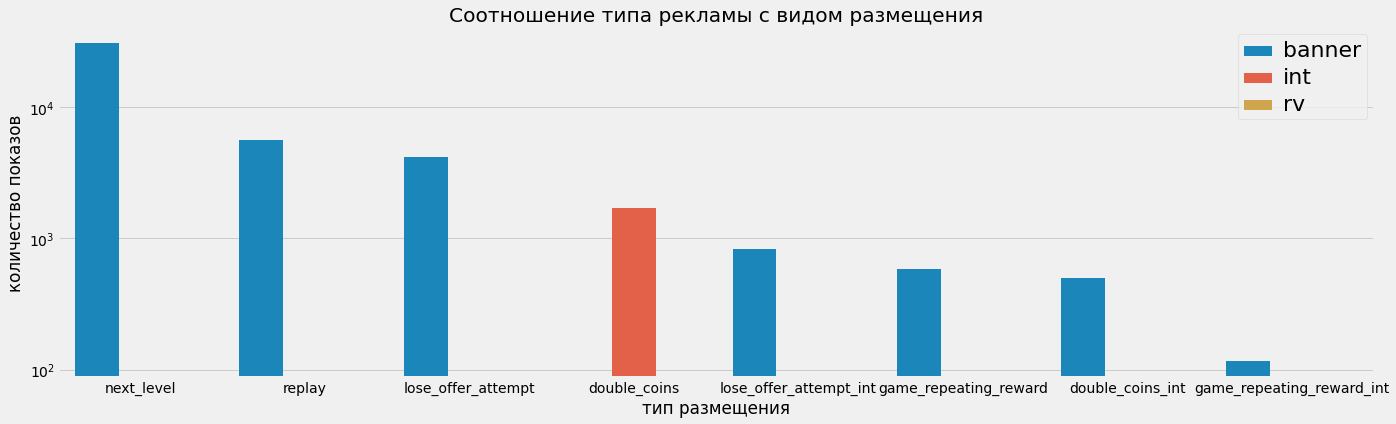

In [36]:
fig1 = plt.figure(figsize=(21,6))
ax_3 = sns.barplot(x='index', y='placement', data=df['placement'].value_counts().reset_index(), hue=df['ad_type'])
ax_3.set_yscale('log')
ax_3.set_xlabel('тип размещения')
ax_3.set_ylabel('количество показов')
ax_3.set_title('Соотношение типа рекламы с видом размещения')
plt.legend(loc='upper right')
plt.setp(ax_3.get_legend().get_texts(), fontsize='22');

Видно, что во всех типах размещения преобладает Баннер, кроме "double_coins", в котором лидирует формат "int" 

In [37]:
# создадим датафрейм с группировкой по формату ad_type и подсчетами метрик: 'sum', 'count', 'mean', 'median'
stats_ad_type = df.groupby('ad_type', as_index=False)['revenue'].agg(['sum', 'count', 'mean', 'max', 'min']).reset_index()

In [38]:
stats_ad_type['mean'] = stats_ad_type['mean'] *1000
stats_ad_type['max'] = stats_ad_type['max'] * 1000
stats_ad_type['min'] = stats_ad_type['min'] * 1000

In [39]:
stats_ad_type

,ad_type,sum,count,mean,max,min
0,banner,607.184041,815984,0.744113,63.750000,0.000064
1,int,1361.952967,37613,36.209634,937.195984,0.000000
2,rv,421.661652,6482,65.051165,916.205811,0.160666


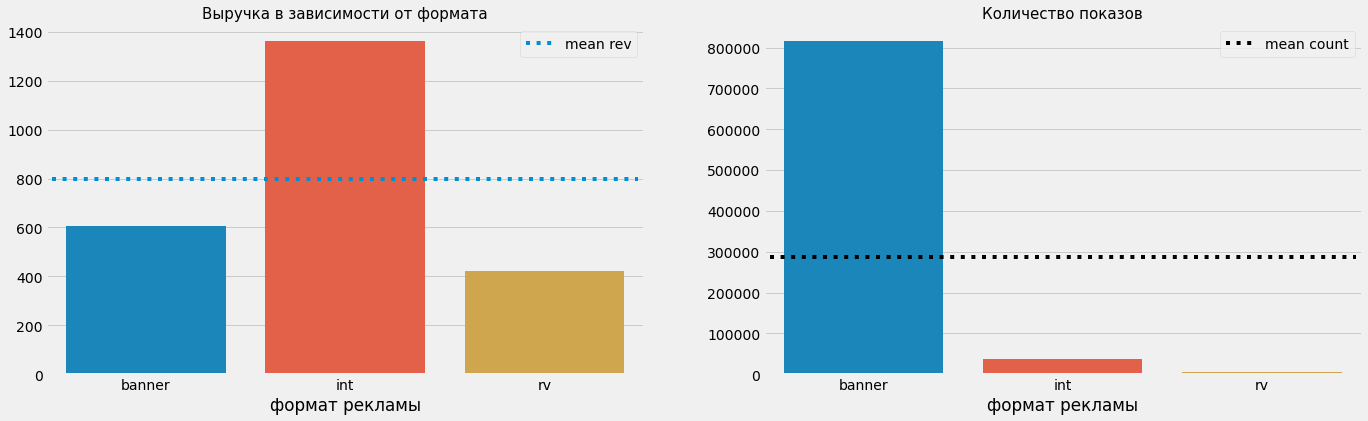

In [42]:
target_mean_revenue = df['revenue'].mean()
target_count_mean = df['revenue'].count() / df['ad_type'].nunique()
target_sum_mean = df['revenue'].sum() / df['ad_type'].nunique()

plt.figure(figsize=(21,6))
plt.subplot(1, 2, 1)
ax_4 = sns.barplot(x='ad_type', y='sum', data=stats_ad_type)
plt.axhline(y=target_sum_mean, xmin=0.01, xmax=0.99, label='mean rev', linestyle=':', linewidth=4)
ax_4.set_xlabel('формат рекламы')
ax_4.set_ylabel('')
ax_4.set_title('Выручка в зависимости от формата', fontsize='15')
plt.legend()

plt.subplot(1, 2, 2)
ax_5 = sns.barplot(x='ad_type', y='count', data=stats_ad_type)
plt.axhline(y=target_count_mean, xmin=0.01, xmax=0.99, label='mean count', linestyle=':', linewidth=4, color='black')
ax_5.set_xlabel('формат рекламы')
ax_5.set_ylabel('')
ax_5.set_title('Количество показов', fontsize='15')
plt.legend();

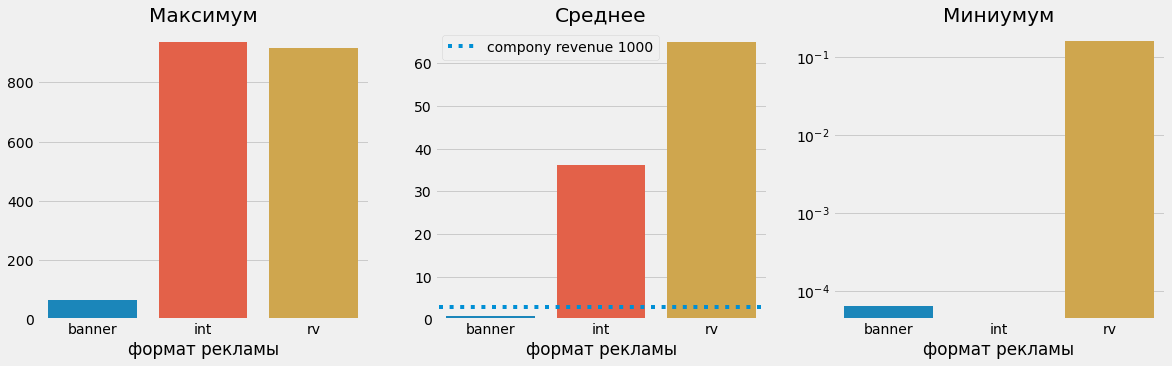

In [43]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
ax_6 = sns.barplot(x='ad_type', y='max', data=stats_ad_type.iloc[:,[0, 4]])
ax_6.set_title('Максимум')
ax_6.set_xlabel('формат рекламы')
ax_6.set_ylabel('')

plt.subplot(1, 3, 2)
plt.axhline(y=target_mean_revenue * 1000, xmin=0.01, xmax=0.99, 
            label='compony revenue 1000', linestyle=':', linewidth=4)
ax_7 = sns.barplot(x='ad_type', y='mean', data=stats_ad_type.iloc[:,[0, 3]])
ax_7.set_title('Среднее')
ax_7.set_xlabel('формат рекламы')
ax_7.set_ylabel('')
plt.legend()

plt.subplot(1, 3, 3)
ax_8 = sns.barplot(x='ad_type', y='min', data=stats_ad_type.iloc[:,[0, 5]])
ax_8.set_title('Миниумум')
ax_8.set_xlabel('формат рекламы')
ax_8.set_ylabel('')
ax_8.set_yscale('log');

Среди представленных форматов наиболее доходным является "int" почти 1400. В среднем показ приносит 0.035.
Формат рекламы "banner", несмотря на огромное количество показов, только второй по выручке (при этом не дотягивает до средней вырчки по всей рекламе), по средней выручке значительно уступает как "int", так и "rv" и также его средний доход ниже среднего по всей рекламе в целом. 
У "rv" меньше всего показов, но при этом в среднем его показ приносит больше денег, чем другие форматы. Можно препдоложить, что дополнительные показы на 2852, то есть до 9334 должны позволить "rv" сравняться по выручке с  "banner", но стоит учесть, что с ростом количества показов падает средний доход.  Однако нам видится, что формат  "rv" является точкой роста, где необходимо приложить усилия для наращивания выручки, которая в два раза меньше средней выручки по всей рекламе: 400 vs 800

### Отбор городов, версий ОС для последующего анализа

#### 1. Города

Попробуем сократить общее количество городов, используя кластеризацию

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn import preprocessing

In [45]:
#Группирую города по выручке, считаю сумму и количество
df_city = df.groupby(['city'])['revenue'].agg(['sum', 'count']).reset_index().sort_values(by='count', ascending=False) \
.rename(columns={'sum': 'revenue', 'count': 'cnt_users'})

In [46]:
df_city.head()

,city,revenue,cnt_users
585,New York,47.454397,17584
540,Minneapolis,34.235291,12980
377,Houston,34.551763,10137
796,Springfield,12.421576,10135
140,Charlotte,25.620972,9750


In [47]:
# произвожу нормализацию данных
scaler = preprocessing.MinMaxScaler(feature_range=(0, 2))
df_city['revenue_std'] =scaler.fit_transform(df_city.iloc[:,[1,2]])[:,0]
df_city['cnt_users_std'] =scaler.fit_transform(df_city.iloc[:,[1,2]])[:,1]

In [48]:
# итоговый результат
df_city.head(10)

,city,revenue,cnt_users,revenue_std,cnt_users_std
585,New York,47.454397,17584,2.000000,2.000000
540,Minneapolis,34.235291,12980,1.442871,1.476312
377,Houston,34.551763,10137,1.456209,1.152932
796,Springfield,12.421576,10135,0.523515,1.152704
140,Charlotte,25.620972,9750,1.079814,1.108912
147,Chicago,14.087139,8697,0.593711,0.989137
745,San Antonio,11.062926,7912,0.466254,0.899846
388,Indianapolis,36.679515,7126,1.545884,0.810442
413,Kansas City,18.689349,7038,0.787675,0.800432
301,Gallatin,6.259968,6573,0.263829,0.747540


In [49]:
# отбираю нужные колонки для кластеризации
df_city_values_std_ = df_city.iloc[:,[3,4]].values

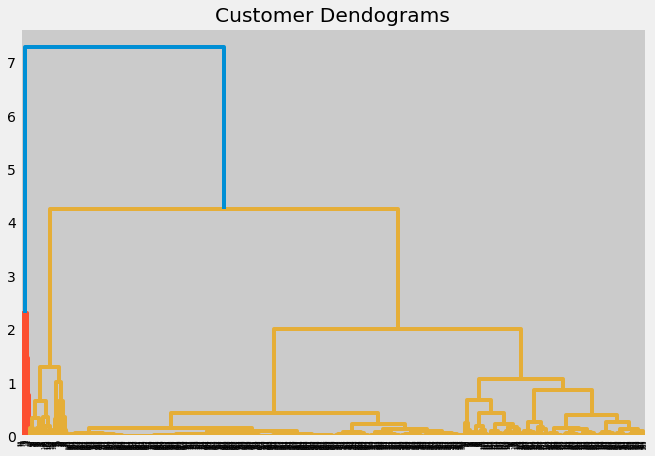

In [50]:
# с нормализацией, строю диаграмму, по ней определяю, что наиболее подходящее число кластеров = 5
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_city_values_std_, method='ward'))

In [51]:
# провожу кластеризацию
cluster_std_ = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster_std_.fit_predict(df_city_values_std_)
print()

In [52]:
# создаю новый столбец, куда заному метку кластера для каждого города
df_city['cluster_std_'] = pd.Series(cluster_std_.labels_).values

In [53]:
# считаю метрики по каждому кластеру, мне кажется, что нужно немного перегруппировать получившиеся кластеры
df_city.groupby('cluster_std_', as_index=False)[['revenue', 'cnt_users']].agg(['sum', 'count', 'mean'])

revenue                  cnt_users                    
                     sum count       mean       sum count          mean
cluster_std_                                                           
0             211.017433     6  35.169572     64024     6  10670.666667
1             522.087782   267   1.955385    207217   267    776.093633
2             465.104064    56   8.305430    148879    56   2658.553571
3             153.222931     9  17.024770     64912     9   7212.444444
4             168.520386   582   0.289554     51339   582     88.211340

In [54]:
# делаю перегруппировку
df_city.loc[(df_city['cluster_std_'] == 3), 'cluster_std_'] = 0
df_city.loc[(df_city['cluster_std_'] == 2), 'cluster_std_'] = 0

In [55]:
df_city.groupby('cluster_std_', as_index=False)[['revenue', 'cnt_users']].agg(['sum', 'count', 'mean'])

revenue                  cnt_users                   
                     sum count       mean       sum count         mean
cluster_std_                                                          
0             829.344429    71  11.680907    277815    71  3912.887324
1             522.087782   267   1.955385    207217   267   776.093633
4             168.520386   582   0.289554     51339   582    88.211340

#### По итогу кластеризации выделяются три кластера:
1. top кластер, в него входят всего 71 городов, то есть это 7% от общего числа, но при этом он обеспечивает 54% от всей выручки и 52% игроков.
2. middle кластер, в него входят 267 города, это почти 30% от общего числа, данный кластер дает 48% выручки и 38% всех игроков.
3. low кластер, это самый многочисленый, куда входят 582 города, но при это его доля в выручке составляет всего 11%, а количество игроков менее 10% от всех пользователей.

Таким образом, top кластер и middle кластер обеспечивают до 90% выручки и игроков. Но при этом количество городов, входящих в их состав, составляет 338 или 36%. То есть, если анализировать только эти два кластера, то мы потеряем 10% информации по выручке и игрокам, но при этом существенно можем снизить выборку для дальнейшего анализа.  

In [56]:
# Объединяю два датафрейма в один и удаляю ненужные колонки
df_ = df.merge(df_city, how = 'left', on='city')
df_.drop(['revenue_y', 'cnt_users', 'revenue_std', 'cnt_users_std'], axis=1, inplace=True)

In [57]:
# Проверяю, что ничего не потерял при объединении
df_.groupby('cluster_std_')['revenue_x'].agg(['sum', 'count'])

,sum,count
cluster_std_,,
0.0,829.344429,277815
1.0,522.087782,207217
4.0,168.520386,51339


In [58]:
# Переименую колонки для удобства
df_.rename(columns={'revenue_x': 'revenue', 'cluster_std_': 'id_cluster_city'}, inplace=True)

In [59]:
# Переименую значения в id_cluster_city согласно классификации
df_.replace({'id_cluster_city': {0: 'top', 1:'middle', 4: 'low'}}, inplace=True)

In [60]:
df_['id_cluster_city'].value_counts()

top       277815
middle    207217
low        51339
Name: id_cluster_city, dtype: int64

In [61]:
df_.columns

Index(['profile_id', 'os_version', 'device_manufacturer', 'device_model',
       'device_type', 'device_locale', 'event_name', 'event_json',
       'event_datetime', 'event_timestamp', 'event_receive_datetime',
       'event_receive_timestamp', 'connection_type', 'operator_name',
       'country_iso_code', 'city', 'event_day', 'event_receive_day',
       'event_hour', 'event_receive_hour', 'ad_type', 'placement',
       'view_index', 'revenue', 'ads_ltv', 'network_name', 'id_cluster_city'],
      dtype='object')

##### Теперь проанализируем каждый формат рекламы в разбивке по кластеру top и middle

### Формат рекламы banner

In [62]:
# Делаю отбор по формату == 'banner' и кластерам == top и middle
df_banner_top_middle_clst = df_.loc[(df_['ad_type'] == 'banner') & (df_['id_cluster_city'] != 'low')]

In [63]:
# Группирую по кластерам и считаю метрики
df_grp_banner_top_mid_clst =df_banner_top_middle_clst.groupby('id_cluster_city', as_index=False)['revenue'] \
                            .agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_grp_banner_top_mid_clst['mean'] = df_grp_banner_top_mid_clst['mean'].mul(1000)
df_grp_banner_top_mid_clst.rename(columns={'mean':'eCPM'}, inplace=True)
df_grp_banner_top_mid_clst['ad_type'] = 'banner'
df_grp_banner_top_mid_clst

,id_cluster_city,min,max,sum,count,eCPM,ad_type
0,middle,1.104731e-07,0.041422,123.966085,196494,0.630890,banner
1,top,8.032500e-08,0.043021,213.101774,263774,0.807895,banner


### Формат рекламы int

In [64]:
# Делаю отбор по формату == 'banner' и кластерам == top и middle
df_int_top_middle_clst = df_.loc[(df_['ad_type'] == 'int') & (df_['id_cluster_city'] != 'low')]

In [65]:
# Группирую по кластерам и считаю метрики
df_grp_int_top_mid_clst =df_int_top_middle_clst.groupby('id_cluster_city', as_index=False)['revenue'] \
                            .agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_grp_int_top_mid_clst['mean'] = df_grp_int_top_mid_clst['mean'].mul(1000)
df_grp_int_top_mid_clst.rename(columns={'mean':'eCPM'}, inplace=True)
df_grp_int_top_mid_clst['ad_type'] = 'int'
df_grp_int_top_mid_clst

,id_cluster_city,min,max,sum,count,eCPM,ad_type
0,middle,0.000642,0.582155,292.087269,8869,32.933507,int
1,top,0.000442,0.937196,458.045283,11912,38.452425,int


### Формат рекламы rv

In [66]:
# Делаю отбор по формату == 'banner' и кластерам == top и middle
df_rv_top_middle_clst = df_.loc[(df_['ad_type'] == 'rv') & (df_['id_cluster_city'] != 'low')]

In [67]:
# Группирую по кластерам и считаю метрики
df_grp_rv_top_mid_clst =df_rv_top_middle_clst.groupby('id_cluster_city', as_index=False)['revenue'] \
                            .agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_grp_rv_top_mid_clst['mean'] = df_grp_rv_top_mid_clst['mean'].mul(1000)
df_grp_rv_top_mid_clst.rename(columns={'mean':'eCPM'}, inplace=True)
df_grp_rv_top_mid_clst['ad_type'] = 'rv'
df_grp_rv_top_mid_clst

,id_cluster_city,min,max,sum,count,eCPM,ad_type
0,middle,0.001149,0.916206,106.034428,1854,57.192248,rv
1,top,0.001424,0.915771,158.197372,2129,74.305952,rv


In [68]:
# Для удобства объединяем вышесозданные датафреймы в один
df_union_all = pd.concat([df_grp_banner_top_mid_clst, df_grp_int_top_mid_clst, df_grp_rv_top_mid_clst])
df_union_all

,id_cluster_city,min,max,sum,count,eCPM,ad_type
0,middle,1.104731e-07,0.041422,123.966085,196494,0.630890,banner
1,top,8.032500e-08,0.043021,213.101774,263774,0.807895,banner
0,middle,6.417075e-04,0.582155,292.087269,8869,32.933507,int
1,top,4.415718e-04,0.937196,458.045283,11912,38.452425,int
0,middle,1.149413e-03,0.916206,106.034428,1854,57.192248,rv
1,top,1.424175e-03,0.915771,158.197372,2129,74.305952,rv


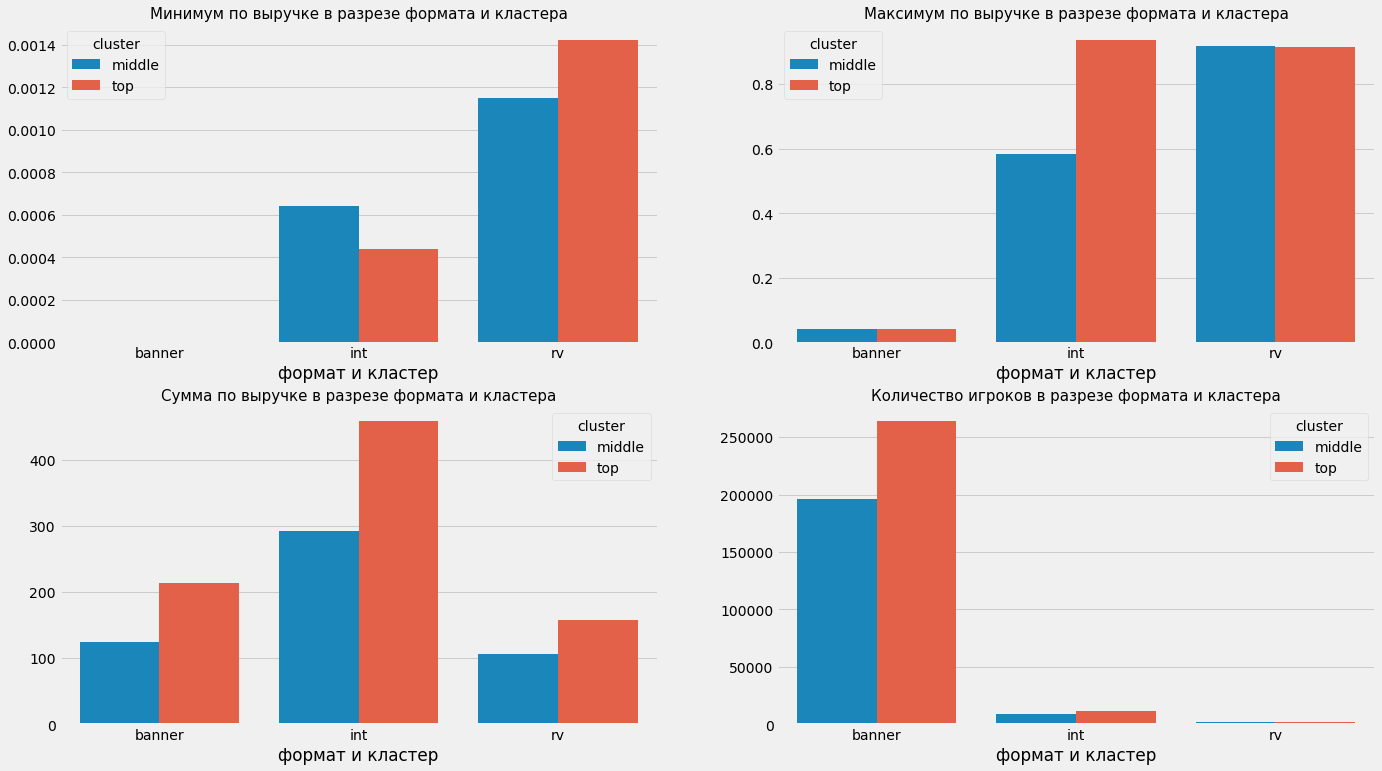

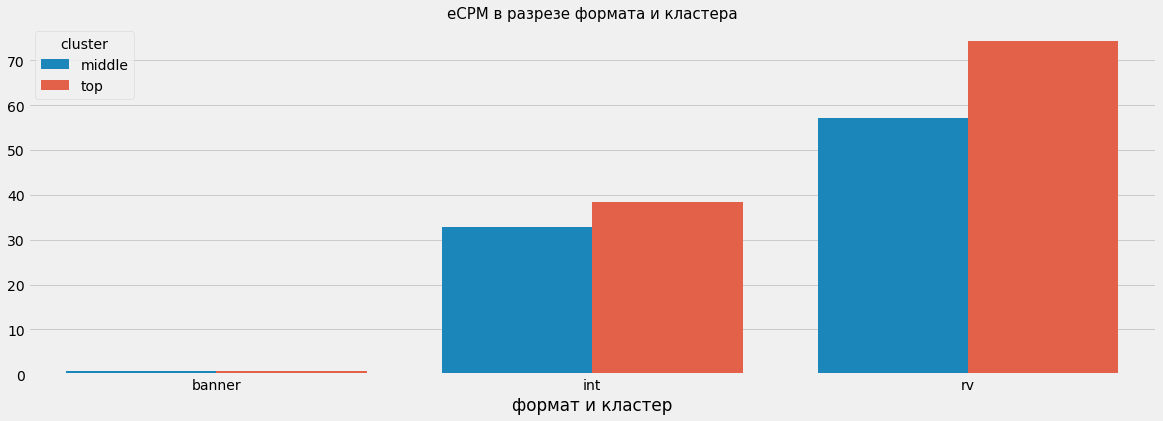

In [69]:
plt.figure(figsize=(21,12))
plt.subplot(2, 2, 1)
ax_format_min = sns.barplot(x='ad_type', y='min', hue='id_cluster_city', data=df_union_all)
ax_format_min.set_xlabel('формат и кластер')
ax_format_min.set_ylabel('')
ax_format_min.set_title('Минимум по выручке в разрезе формата и кластера', fontsize='15')
plt.legend(title='cluster', loc='upper left');

plt.subplot(2, 2, 2)
ax_format_max = sns.barplot(x='ad_type', y='max', hue='id_cluster_city', data=df_union_all)
ax_format_max.set_xlabel('формат и кластер')
ax_format_max.set_ylabel('')
ax_format_max.set_title('Максимум по выручке в разрезе формата и кластера', fontsize='15')
plt.legend(title='cluster')

plt.subplot(2, 2, 3)
ax_format_sum = sns.barplot(x='ad_type', y='sum', hue='id_cluster_city', data=df_union_all)
ax_format_sum.set_xlabel('формат и кластер')
ax_format_sum.set_ylabel('')
ax_format_sum.set_title('Сумма по выручке в разрезе формата и кластера', fontsize='15')
plt.legend(title='cluster')

plt.subplot(2, 2, 4)
ax_format_count = sns.barplot(x='ad_type', y='count', hue='id_cluster_city', data=df_union_all)
ax_format_count.set_xlabel('формат и кластер')
ax_format_count.set_ylabel('')
ax_format_count.set_title('Количество игроков в разрезе формата и кластера', fontsize='15')
plt.legend(title='cluster', loc='upper right')

fig1 = plt.figure(figsize=(18,6))
ax_format_ecpm = sns.barplot(x='ad_type', y='eCPM', hue='id_cluster_city', data=df_union_all)
ax_format_ecpm.set_xlabel('формат и кластер')
ax_format_ecpm.set_ylabel('')
ax_format_ecpm.set_title('eCPM в разрезе формата и кластера', fontsize='15')
plt.legend( title='cluster', loc='upper left');

Видно, что большинство показов приходится на banner и совсем немного на остальные. При это выручка от такого формата 
чуть выше, чем у rv, у которого показов меньше всего. А по eCPM banner находится далеко позади всех остальных. 
RV - третий по выручке, но первый по eCPM. Как ранее писал, что это одна из точек роста, используя которую можно нарастить выручку.
INT первый по выручке и второй по eCPM.

Если смотреть по кластерам, то очевидно, что top по всем важным параметрам обходит кластер middle вне зависимости от формата рекламы. Это значит, что первочередное внимание стоит уделять именно top кластеру, несмотря на небольшое количество городов, присутствующих в нем.

#### 2. ОС. Версии операционной системы Android

In [70]:
# Видно, что количество версий ОС также можно подсократить, ограничившись только четырьмя: 12, 11, 10 и 9
# совокупно они составляют почти 97% от общего числа
df_['os_version'].value_counts(normalize=True).cumsum()

12       0.473895
11       0.716978
10       0.892394
9        0.969900
8.1.0    0.980654
8.0.0    0.989974
7.0      0.994691
7.1.2    0.996797
7.1.1    0.998357
5.0.2    0.999181
6.0.1    1.000000
Name: os_version, dtype: float64

In [71]:
# Отбор по версиям ОС
df_os = df_.loc[(df_['os_version'] == '12') | (df_['os_version'] == '11')  \
                | (df_['os_version'] == '10') | (df_['os_version'] == '9')]

In [72]:
df_os_grp = df_os.groupby('os_version', as_index=False)['revenue'].agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_os_grp['mean'] = df_os_grp['mean'].mul(1000) 
df_os_grp.rename(columns={'mean':'eCPM'}, inplace=True)
df_os_grp

,os_version,min,max,sum,count,eCPM
0,10,1.104731e-07,0.921145,328.267931,150871,2.175819
1,11,6.375000e-08,0.915771,587.224814,209071,2.808734
2,12,8.032500e-08,0.937196,1305.578948,407587,3.203191
3,9,0.000000e+00,0.350000,133.105867,66662,1.996728


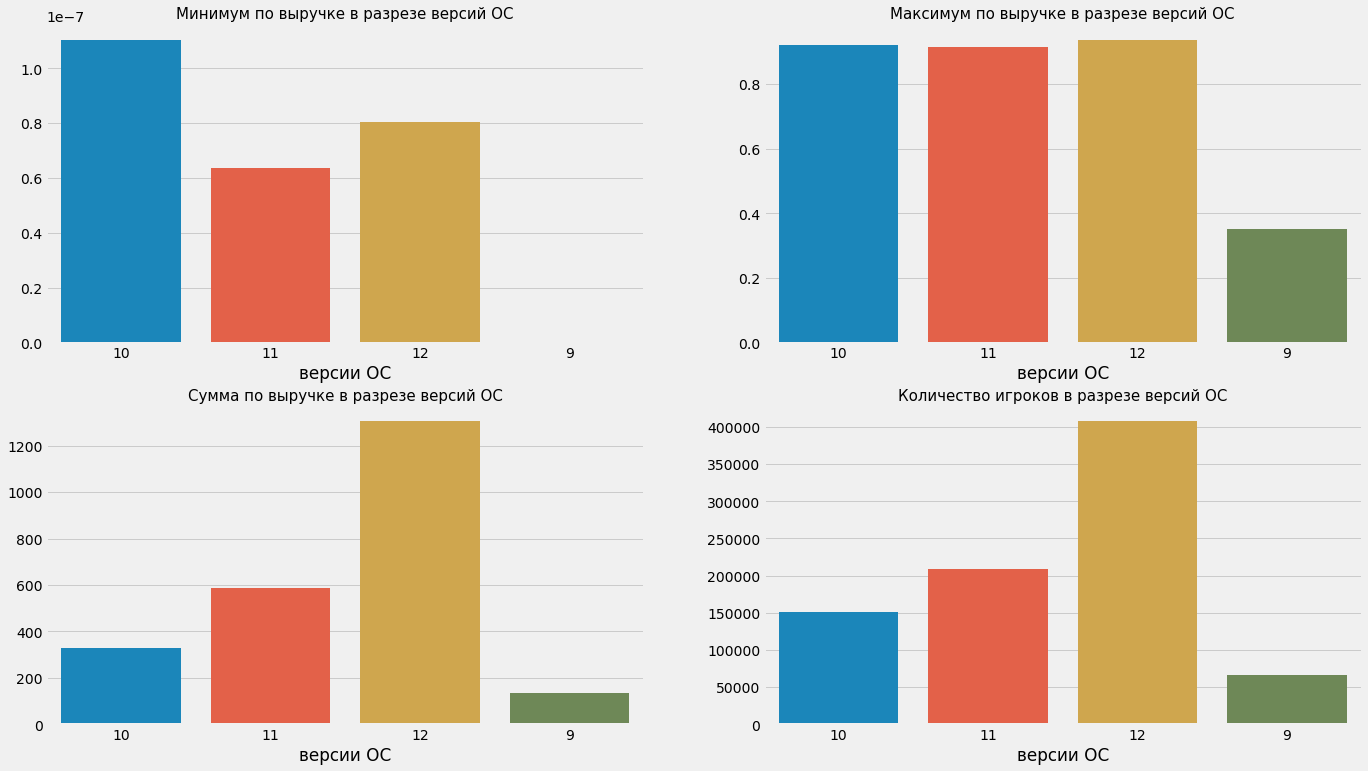

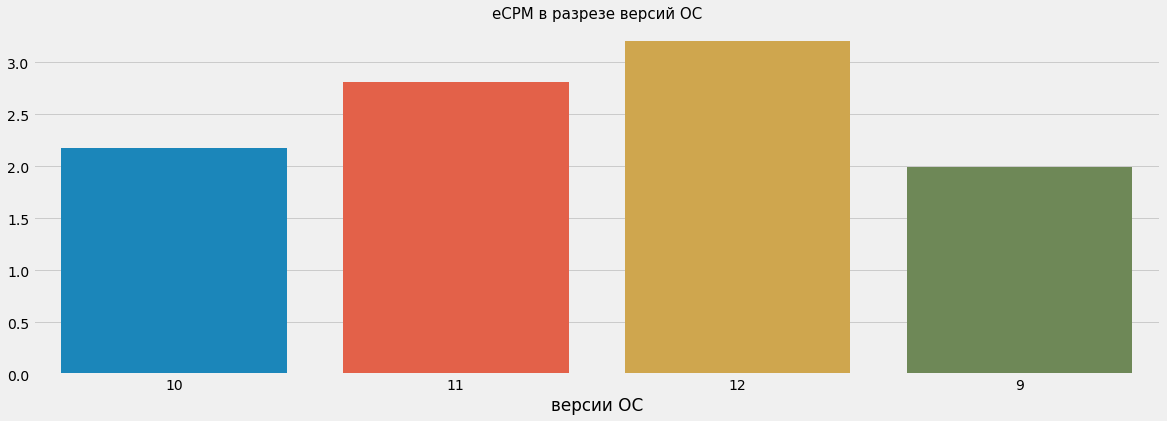

In [73]:
plt.figure(figsize=(21,12))
plt.subplot(2, 2, 1)
ax_os_min = sns.barplot(x='os_version', y='min', data=df_os_grp)
ax_os_min.set_xlabel('версии ОС')
ax_os_min.set_ylabel('')
ax_os_min.set_title('Минимум по выручке в разрезе версий ОС', fontsize='15')

plt.subplot(2, 2, 2)
ax_os_max = sns.barplot(x='os_version', y='max', data=df_os_grp)
ax_os_max.set_xlabel('версии ОС')
ax_os_max.set_ylabel('')
ax_os_max.set_title('Максимум по выручке в разрезе версий ОС', fontsize='15')

plt.subplot(2, 2, 3)
ax_os_sum = sns.barplot(x='os_version', y='sum', data=df_os_grp)
ax_os_sum.set_xlabel('версии ОС')
ax_os_sum.set_ylabel('')
ax_os_sum.set_title('Сумма по выручке в разрезе версий ОС', fontsize='15')

plt.subplot(2, 2, 4)
ax_os_count = sns.barplot(x='os_version', y='count', data=df_os_grp)
ax_os_count.set_xlabel('версии ОС')
ax_os_count.set_ylabel('')
ax_os_count.set_title('Количество игроков в разрезе версий ОС', fontsize='15')

fig1 = plt.figure(figsize=(18,6))
ax_os_ecpm = sns.barplot(x='os_version', y='eCPM', data=df_os_grp)
ax_os_ecpm.set_xlabel('версии ОС')
ax_os_ecpm.set_ylabel('')
ax_os_ecpm.set_title('eCPM в разрезе версий ОС', fontsize='15');

Явным аутсадером вглядит версия ОС №9: уступает остальным версиям по всем показателям. 
Версия №12 - лидер, обладает наилучшими показателями: eCPM, по выручке и ею пользуются большинство игроков. 
Версии №10 и №11 уступают №12, но лучше №9, ближе всего к лидеру версия №11.

#### Версии ОС в разрезе формата рекламы

In [74]:
df_os_format = df_os.groupby(['os_version', 'ad_type'], as_index=False)['revenue'] \
.agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_os_format['mean'] = df_os_format['mean'].mul(1000)
df_os_format.rename(columns={'mean':'eCPM'}, inplace=True)
df_os_format

,os_version,ad_type,min,max,sum,count,eCPM
0,10,banner,1.104731e-07,0.020430,85.002788,143762,0.591274
1,10,int,5.296863e-04,0.921145,191.795052,6144,31.216643
2,10,rv,9.445748e-04,0.597984,51.470091,965,53.336882
3,11,banner,6.375000e-08,0.042650,116.298348,196196,0.592766
4,11,int,4.415718e-04,0.650000,363.634932,10865,33.468471
5,11,rv,1.149413e-03,0.915771,107.291533,2010,53.378872
6,12,banner,8.032500e-08,0.063750,363.488994,387982,0.936871
7,12,int,5.801250e-04,0.937196,704.497187,16619,42.391070
8,12,rv,1.555500e-03,0.916206,237.592767,2986,79.568911
9,9,banner,1.638300e-07,0.012498,34.820249,63361,0.549553


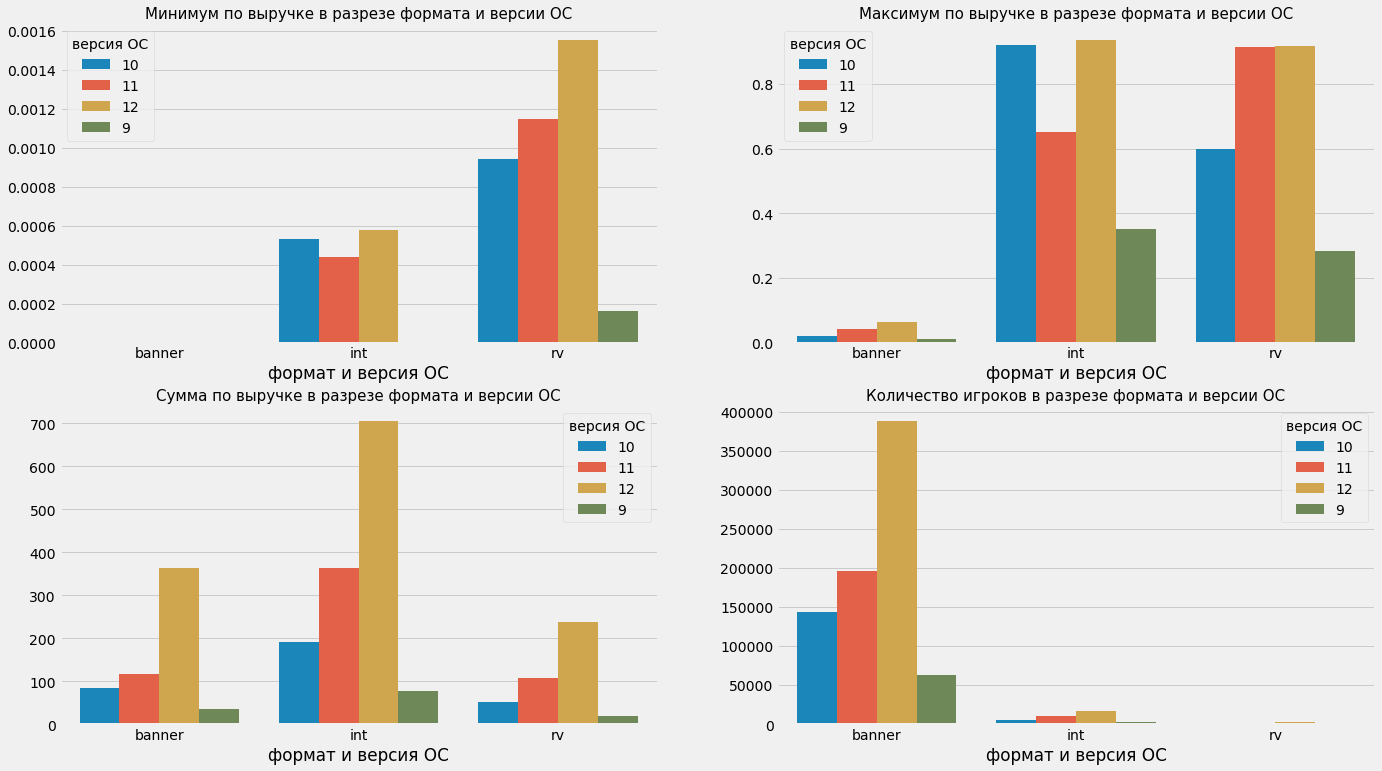

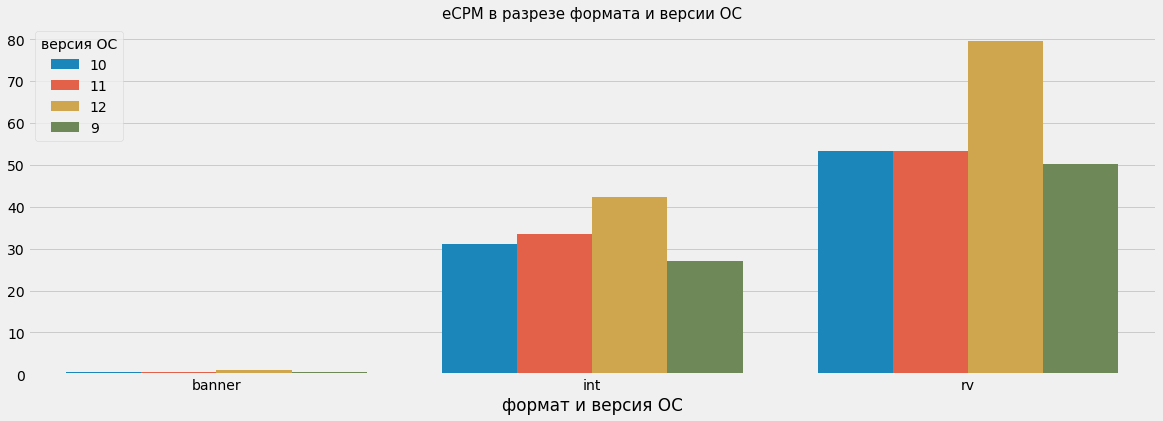

In [75]:
plt.figure(figsize=(21,12))
plt.subplot(2, 2, 1)
ax_os_format_min = sns.barplot(x='ad_type', y='min', hue='os_version', data=df_os_format)
ax_os_format_min.set_xlabel('формат и версия ОС')
ax_os_format_min.set_ylabel('')
ax_os_format_min.set_title('Минимум по выручке в разрезе формата и версии ОС', fontsize='15')
plt.legend(title='версия ОС', loc='upper left');

plt.subplot(2, 2, 2)
ax_os_format_max = sns.barplot(x='ad_type', y='max', hue='os_version', data=df_os_format)
ax_os_format_max.set_xlabel('формат и версия ОС')
ax_os_format_max.set_ylabel('')
ax_os_format_max.set_title('Максимум по выручке в разрезе формата и версии ОС', fontsize='15')
plt.legend(title='версия ОС')

plt.subplot(2, 2, 3)
ax_os_format_sum = sns.barplot(x='ad_type', y='sum', hue='os_version', data=df_os_format)
ax_os_format_sum.set_xlabel('формат и версия ОС')
ax_os_format_sum.set_ylabel('')
ax_os_format_sum.set_title('Сумма по выручке в разрезе формата и версии ОС', fontsize='15')
plt.legend(title='версия ОС')

plt.subplot(2, 2, 4)
ax_os_format_count = sns.barplot(x='ad_type', y='count', hue='os_version', data=df_os_format)
ax_os_format_count.set_xlabel('формат и версия ОС')
ax_os_format_count.set_ylabel('')
ax_os_format_count.set_title('Количество игроков в разрезе формата и версии ОС', fontsize='15')
plt.legend(title='версия ОС', loc='upper right')

fig1 = plt.figure(figsize=(18,6))
ax_os_format_ecpm = sns.barplot(x='ad_type', y='eCPM', hue='os_version', data=df_os_format)
ax_os_format_ecpm.set_xlabel('формат и версия ОС')
ax_os_format_ecpm.set_ylabel('')
ax_os_format_ecpm.set_title('eCPM в разрезе формата и версии ОС', fontsize='15')
plt.legend( title='версия ОС', loc='upper left');

Графики подтверждают вышеизложенные выводы о том, что версия ОС №12 - лидер. Во всех форматах рекламы по рассмотренным метрикам находится на верхних позициях. Опять же наблюдаем ситуацию, когда есть явный лидер(№12), явный аутсайдер (№9) и между ними версии №11 и 10. 

In [7]:
# Версии ОС 9, 10, 11, 12 , подсчет метрик по ads_ltv
df_os_grp_lvt = df_os.groupby('os_version', as_index=False)['ads_ltv'].agg(['min', 'max', 'sum', 'count', 'mean']).reset_index()
df_os_grp_lvt

,os_version,min,max,sum,count,mean
0,10,0.000045,10.204360,159728.477362,150871,1.058709
1,11,0.000047,26.699762,228657.110410,209071,1.093682
2,12,0.000026,18.320245,657964.140536,407587,1.614291
3,9,0.000073,16.971552,151452.515330,66662,2.271947


Таблица подтверждает ранее сделанные выводы о лидерстве ОС версии №12

#### Ранее в EDA мы уже проанализировали количество игроков в зависимости от времени, теперь нужно проанализровать выручку от времени

In [79]:
df_grp_hour_rev = df_.groupby('event_hour', as_index=False)['revenue'].agg(['min', 'max', 'mean', 'sum', 'count']).reset_index()

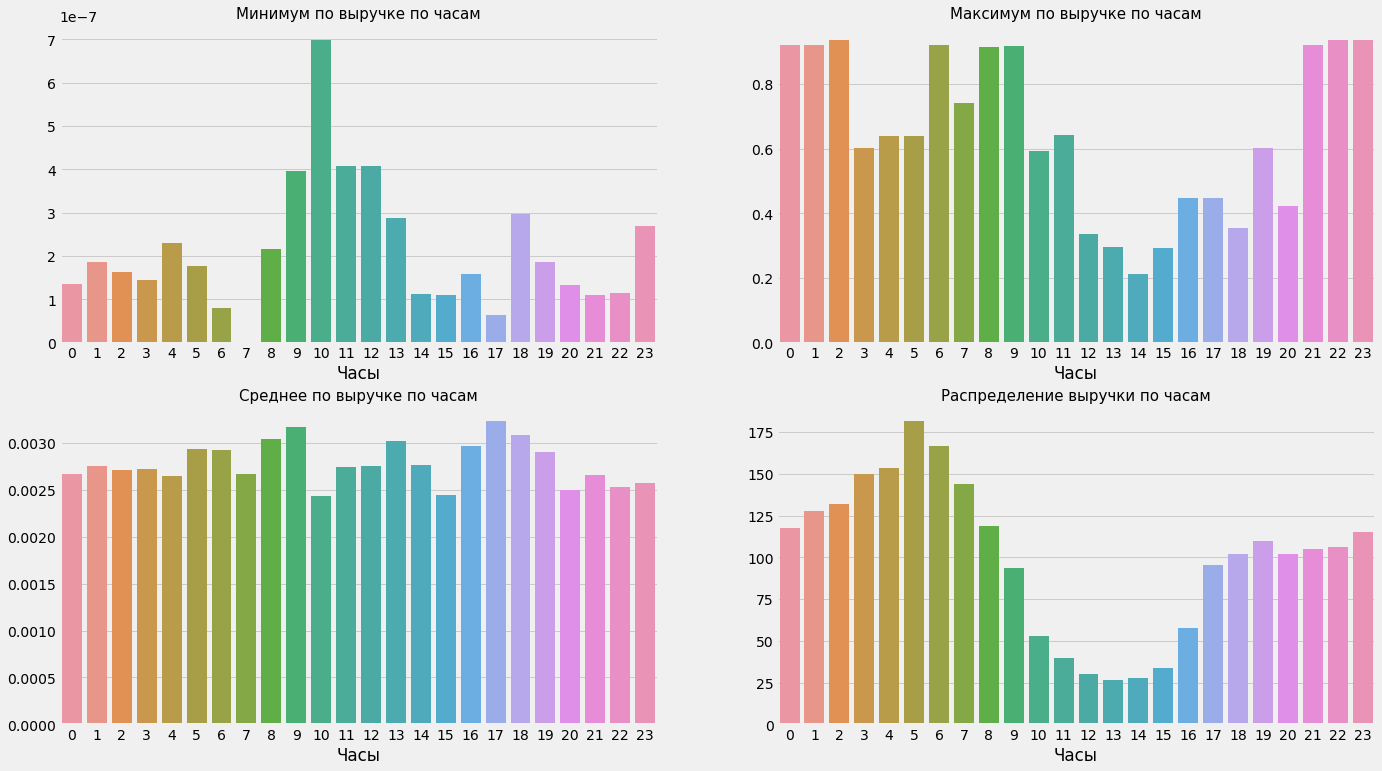

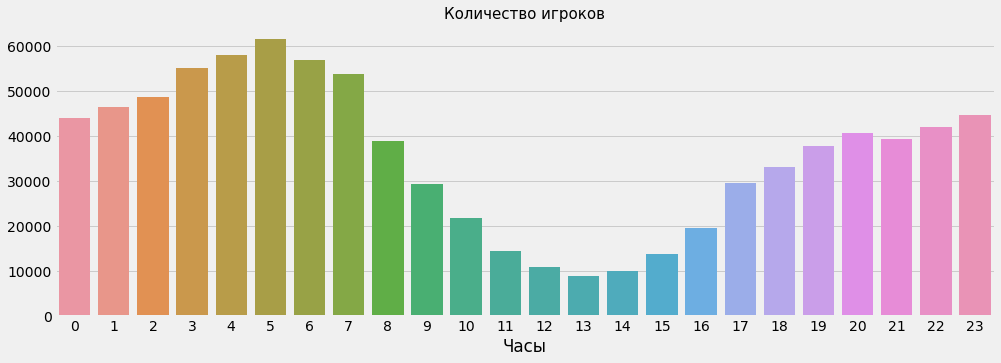

In [89]:
plt.figure(figsize=(21,12))
plt.subplot(2, 2, 1)
ax_hour_rev_min = sns.barplot(x='event_hour', y='min', data=df_grp_hour_rev)
ax_hour_rev_min.set_xlabel('Часы')
ax_hour_rev_min.set_ylabel('')
ax_hour_rev_min.set_title('Минимум по выручке по часам', fontsize='15')

plt.subplot(2, 2, 2)
ax_hour_rev_max = sns.barplot(x='event_hour', y='max', data=df_grp_hour_rev)
ax_hour_rev_max.set_xlabel('Часы')
ax_hour_rev_max.set_ylabel('')
ax_hour_rev_max.set_title('Максимум по выручке по часам', fontsize='15')

plt.subplot(2, 2, 3)
ax_hour_rev_mean = sns.barplot(x='event_hour', y='mean', data=df_grp_hour_rev)
ax_hour_rev_mean.set_xlabel('Часы')
ax_hour_rev_mean.set_ylabel('')
ax_hour_rev_mean.set_title('Среднее по выручке по часам', fontsize='15')

plt.subplot(2, 2, 4)
ax_hour_rev_sum = sns.barplot(x='event_hour', y='sum', data=df_grp_hour_rev)
ax_hour_rev_sum.set_xlabel('Часы')
ax_hour_rev_sum.set_ylabel('')
ax_hour_rev_sum.set_title('Распределение выручки по часам', fontsize='15')

plt.figure(figsize=(15,5))
ax_hour_rev_count = sns.barplot(x='event_hour', y='count', data=df_grp_hour_rev)
ax_hour_rev_count.set_xlabel('Часы')
ax_hour_rev_count.set_ylabel('')
ax_hour_rev_count.set_title('Количество игроков', fontsize='15');

Из графиков видно, что выручка и количество игроков достигают максимальных показателей в утренние часы, а именно в промежутке с 4 до 6 утра с пиком на 5 часов. Минимальные значения приходятся на время обеда с 12 до 14 часов дня.

### Общее резюме

В датасете представлена выборка по 4226 уникальным пользователям в период 2022-01-29 по 2022-02-07, которым показывалась реклама начиная с 2022-02-03 по 2022-02-07. Георгафия игроков представлена в основном страной США, но есть представители Великобритании, Индии. Всего 9 стран. Из 920 городов по количеству пользователей лидирует New York, на втором месте со значительным отставанием расположился Minneapolis, затем идет большая группа городов с примерно одиноковыми показателями: Houston, Springfield,Charlotte. 

Технические характеристики девайсов:
 - Работают на платформе Android, в основном представлены версии 12, 11, 10
 - Телефоны в основном бренда Samsung, но есть также Google, Motorola, LG, всего 34 бренда
 - Модели телефонов представлены серией Galaxy и SM
 - Телекомуникационные услуги обеспечивают 92 оператора связи. Основными из которых являются Verizon, AT&T и T-Mobile
 
Если смотреть по времени суток, то видно, что выручка и количество игроков достигают максимальных показателей в утренние часы, а именно в промежутке с 4 до 6 утра с пиком на 5 часов. Минимальные значения приходятся на время обеда с 12 до 14 часов дня.
 
Среди представленных форматов рекламы наиболее доходным является "int" почти 1400. В среднем показ приносит 0.035.
Формат рекламы "banner", несмотря на огромное количество показов, только второй по выручке (при этом не дотягивает до средней вырчки по всей рекламе), по средней выручке значительно уступает как "int", так и "rv" и также его средний доход ниже среднего по всей рекламе в целом.

У "rv" меньше всего показов, но при этом в среднем его показ приносит больше денег, чем другие форматы. Можно препдоложить, что дополнительные показы на 2852, то есть до 9334 должны позволить "rv" сравняться по выручке с  "banner", но стоит учесть, что с ростом количества показов упадет средний доход.  Однако нам видится, что формат  "rv" является точкой роста, где необходимо приложить усилия для наращивания выручки, которая в два раза меньше средней выручки по всей рекламе: 400 vs 800

Как ранее было сказано в выборке присутствуют 920 городов, не все города значимы по приносимой выручке, количеству игроков и т.д. Поэтому имеет смысл сгруппировать в некие группы для удобства анализа и выявления наиболее важных кластеров, сконцентрировав на которые усилия можно получить бОльшую выгоду.

При процедуре кластеризации было выявлено 3 основопологающих кластера:
 1. top кластер, в него входят всего 71 городов, то есть это 7% от общего числа, но при этом он обеспечивает 54% от всей выручки и 52% игроков.
 2. middle кластер, в него входят 267 города, это почти 30% от общего числа, данный кластер дает 48% выручки и 38% всех игроков.
 3. low кластер, это самый многочисленый, куда входят 582 города, но при это его доля в выручке составляет всего 11%, а количество игроков менее 10% от всех пользователей.
 
Таким образом, top кластер и middle кластер обеспечивают до 90% выручки и игроков. Но при этом количество городов, входящих в их состав, составляет 338 или 36%. То есть, если анализировать только эти два кластера, то мы потеряем 10% информации по выручке и игрокам, то есть наши усилия можно направлять только на эти 338 городов и они будут приносить наибольшую отдачу.

Если попытаться рассмотреть полученные кластера в разрезе формата рекламы, то можно сказать следующее:
 - Top кластер по всем важным параметрам обходит middle вне зависимости от формата рекламы. Это значит, что первочередное внимание стоит уделять именно top кластеру, несмотря на небольшое количество городов, присутствующих в нем.
 - Вне зависимости от кластера большинство показов приходится на banner и совсем немного на остальные. Что весьма логично, т.к. в EDA было видно, что показы идут в основном от banner. При это выручка от такого формата чуть выше, чем у rv, у которого показов меньше всего. А по eCPM banner находится далеко позади всех остальных. RV - третий по выручке, но первый по eCPM. Как ранее писал, что это одна из точек роста, используя которую можно нарастить выручку. INT первый по выручке и второй по eCPM.

Количество версий ОС также можно редуцировать до 4: №12, №11, №10 и №9. Остальные не являются сколько то бы значимыми. 
Явным аутсадером из четверки выглядит версия ОС №9: уступает остальным версиям по всем показателям: выручка, количество игроков и т.д. Версия №12 - лидер, обладает наилучшими показателями: eCPM, по выручке и ею пользуются большинство игроков. 
Версии №10 и №11 уступают №12, но лучше №9, ближе всего к лидеру версия №11.

#### Сохранение и чтение данных

In [77]:
df_.to_pickle('df_.pkl')

In [2]:
df_ = pd.read_pickle('df_.pkl')